In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from information import *
from processing import *
from plotting import *

In [18]:
variable = 'intpp'
frequency = 'monthly'
ensembleid = '*01'
maskset = 'global'
# Select region
region = 'pacific_T'
savedir = ppeDict['datasavedir']+'/processed/regionalmeans/'
filename = '.'.join([variable,frequency,ensembleid,maskset,'nc'])
es = xr.open_mfdataset(savedir+filename,preprocess=preprocess_climpred)[variable].sel(region=region)
ensembleid = 'control'
filename = '.'.join([variable,frequency,ensembleid,maskset,'nc'])
cs = xr.open_dataset(savedir+filename)[variable].sel(region=region)

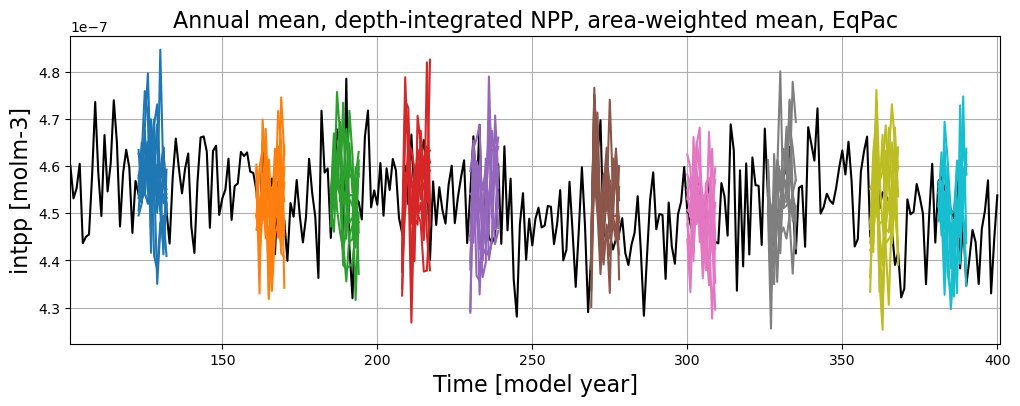

In [21]:
# Take annual means
esann = es.coarsen(lead=12).mean('lead')
csann = cs.coarsen(time=12).mean('time')
# Get time characteristics for control
stride = 1
nt = len(csann['time'])
csinit = csann['time'][0].dt.year.values
time = np.arange(csinit,csinit+nt,stride)

colors = list(mcolors.TABLEAU_COLORS.keys())

fig,ax = plt.subplots(figsize=(12,4))
ax.plot(time,csann,color='black')
for i,init in enumerate(esann['init']):
    year = init.dt.year.values
    timenow = np.arange(year,year+len(esann['lead']))
    esnow = esann.sel(init=init)
    ax.plot(timenow,esnow,color=colors[i])
ax.set_xlim([csinit,csinit+nt])
ax.grid('--')
ax.set_ylabel(variable+' [molm-3]',fontsize=16)
ax.set_xlabel('Time [model year]',fontsize=16)
ax.set_title('Annual mean, depth-integrated NPP, area-weighted mean, EqPac',fontsize=16)
save_fig(fig,
         'timeseries',
         variable,
         '-'.join([frequency,'01',maskset]),
         [region,'annualmeans','fullexperiment'])

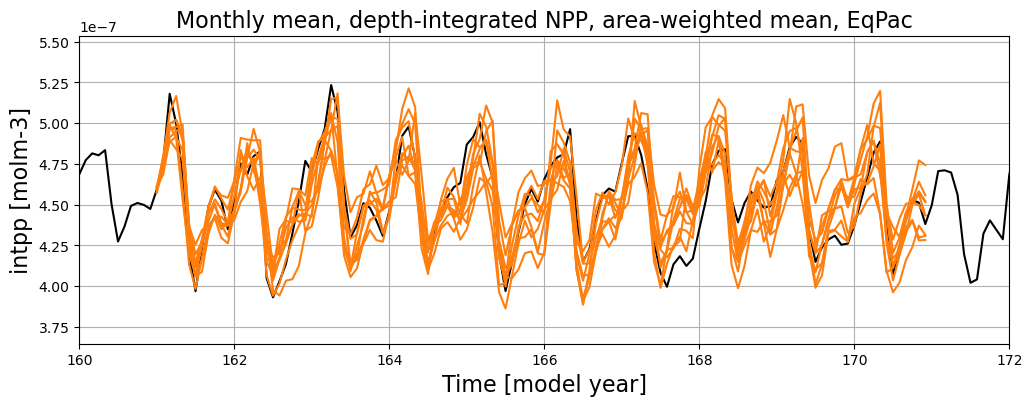

In [23]:
# Get time characteristics for control
stride = 1/12
nt = len(csann['time'])
csinit = csann['time'][0].dt.year.values
time = np.arange(csinit,csinit+nt,stride)

colors = list(mcolors.TABLEAU_COLORS.keys())

colors = list(mcolors.TABLEAU_COLORS.keys())
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(time,cs,color='black')
for i,init in enumerate(es['init']):
    year = init.dt.year.values
    timenow = np.arange(year,year+len(esann['lead']),stride)
    esnow = es.sel(init=init)
    ax.plot(timenow,esnow,color=colors[i])
ax.set_xlim([160,172])
ax.grid('--')
ax.set_ylabel(variable+' [molm-3]',fontsize=16)
ax.set_xlabel('Time [model year]',fontsize=16)
ax.set_title('Monthly mean, depth-integrated NPP, area-weighted mean, EqPac',fontsize=16)
save_fig(fig,
         'timeseries',
         variable,
         '-'.join([frequency,'01',maskset]),
         [region,'zoom016101'])